<a href="https://colab.research.google.com/github/lucasely/data_science/blob/master/Analisando_os_Dados_do_Airbnb_da_cidade_de_Roma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
#### **[Lucas Ely](https://www.linkedin.com/in/lucasely/)**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# **Análise dos dados do Airbnb da cidade de Roma**

Neste *notebook*, iremos analisar os dados referentes à cidade de Roma, e ver quais *insights* podem ser extraídos a partir de dados brutos.

<center><img alt="Analisando Airbnb" width="90%" src="https://d12dkjq56sjcos.cloudfront.net/pub/media/catalog/product/cache/cc97dcefdad38e30e4c65a42f2529e4f/r/o/rome-night-tour-big-bus-tours.jpg"></center>

## Airbnb

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="40%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

## Roma

Uma das cidades históricas mais visitas da península itálica, considerada como o berço da civilização ocidental e nos tempos antigos, a capital do **Império Romano**, podendo ser considerada uma das cidades mais importantes da história da humanidade.

Diante destes fatos, é uma das cidades mais visitadas da União Européia, a atração turística mais importante da Itália, tendo seu centro histórico classificado pela UNESCO como **Patrimônio Mundial**, possuindo monumentos e museus tais como os Museus Vaticanos e o Coliseu.



## Obtenção dos Dados

Os dados utilizados nesta análise foram extraídos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Nesta análise exploratória, será utilizado o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rome (good for visualisations).*


In [0]:
# Importando as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Importando o arquivo listings.csv para um DataFrame

df_rome = pd.read_csv('http://data.insideairbnb.com/italy/lazio/rome/2020-04-29/visualisations/listings.csv')

## Análise dos Dados

Esta etapa tem como objetivo a contextualização inicial e garantir um entendimento de como os dados estão estruturados neste arquivo.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# Mostrando as 5 primeiras entradas do arquivo

df_rome.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2737,"Single room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.87218,12.48355,Private room,18,60,7,2015-05-28,0.11,5,365
1,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.88826,12.47002,Private room,100,1,55,2017-10-31,0.39,3,365
2,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.89503,12.49163,Entire home/apt,105,2,17,2018-10-01,0.15,6,365
3,11834,"Roma ""Charming Boschetto House""",44552,Serena,NaN,I Centro Storico,41.89574,12.49058,Entire home/apt,85,2,142,2020-01-03,1.29,1,345
4,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.92584,12.46809,Entire home/apt,95,3,39,2015-07-19,0.34,1,365


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Prosseguindo em nossa análise, iremos identificar a quantidade de entradas que nossa base de dados contém e os tipos de cada *feature*.

In [0]:
# Identificando o volume de dados do DataFrame
print('Entradas:\t {}'.format(df_rome.shape[0]))
print('Variáveis:\t {}'.format(df_rome.shape[1]))

# Verificando os tipos das entradas do dataset
display(df_rome.dtypes)

Entradas:	 31215
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Qual a porcentagem de valores ausentes no *dataset*?**

Um *dataset* tem sua qualidade condicionada à quantidade de valores ausentes, sendo assim, é necessário verificar se os valores nulos são significativos em relação ao total de entradas.


In [0]:
# Ordenando de forma decrescente as variáveis por seus valores ausentes

(df_rome.isnull().sum()/df_rome.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.197437
last_review                       0.197437
name                              0.000320
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

A partir disto é possível verificar que:

* A *feature* `neighbourhood_group` possui 100% dos seus valores nulos.
* As colunas `reviews_per_month` e `last_review` possuem valores nulos em 19,74% de suas entradas.
* A variavél `name` tem menos de 0,1% dos valores nulos.


### **Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, plotaremos o histograma das variaváveis numéricas.

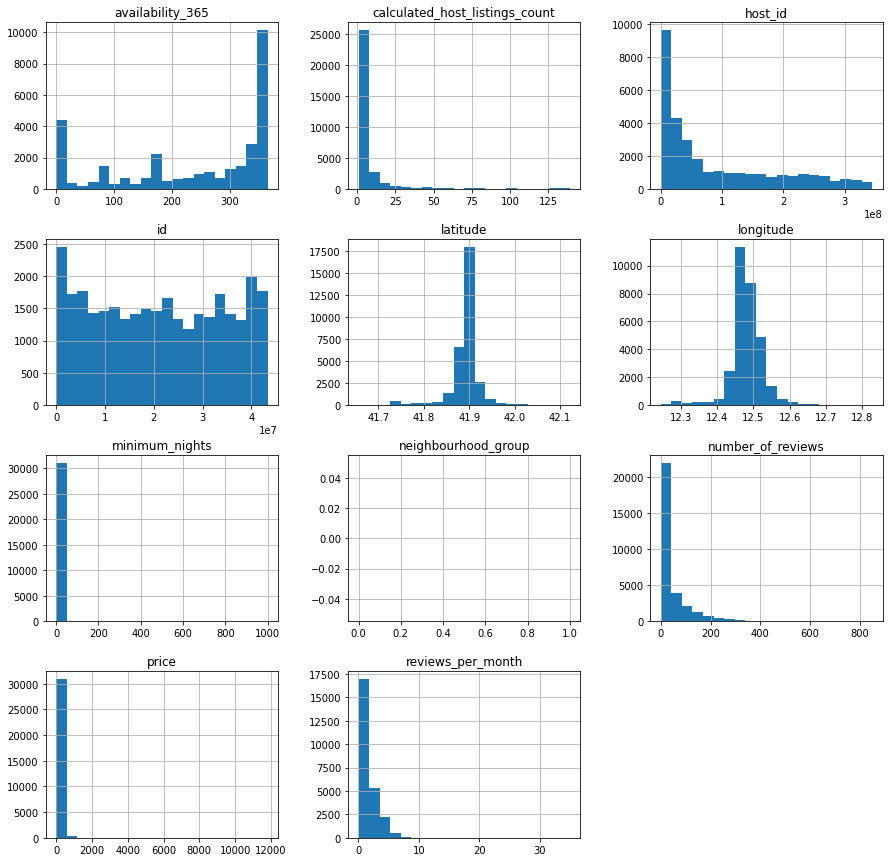

In [0]:
# Plotando o histograma das variáveis numéricas

df_rome.hist(bins=20, figsize=(15,15));


### **Há *outliers* presentes?**

Pela distribuição do histrograma acima, é possível identificar indícios da presença de *outliers*, como por exemplo nas *features* `price`, `minimum_nights` , `number_of_reviews` e `calculated_host_listings_count`.

Estes valores não seguem uma distribuição, desta forma distorcem a representação gráfica. Para confirmar, há duas maneiras que auxiliam a detecção de *outliers*, são elas:

* Resumo estatístico por meio do método `describe()`.
* Plotar `boxplots` para a variável.

In [0]:
# Verificando o resumo estatístico das variáveis numéricas.

df_rome[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,31215.000000,31215.000000,31215.000000,25052.000000,31215.000000,31215.000000
mean,111.487041,3.080154,43.126862,1.460446,7.181643,235.998270
std,276.420392,15.307859,70.042274,1.518958,16.905015,132.775951
min,3.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,1.000000,0.280000,1.000000,124.000000
50%,75.000000,2.000000,12.000000,0.930000,2.000000,293.000000
75%,115.000000,3.000000,55.000000,2.220000,6.000000,357.000000
max,11818.000000,1000.000000,850.000000,34.960000,139.000000,365.000000


Analisando o resumo acima, podemos chegar a seguintes hipóteses:

* A variavél `price` possui 75% do valor abaixo de 115, porém seu valor máximo é de 11818.
* A quantidade mínima de noites (`minimum_nights`) está acima de um ano.


#### Boxplot para price:

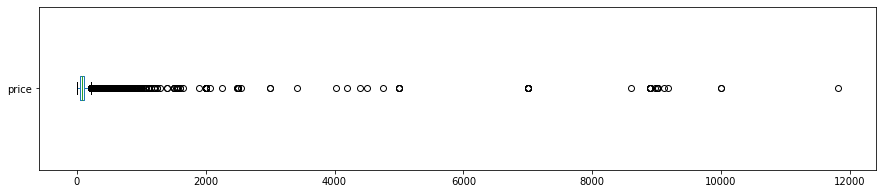

Price - Valores acima de 600:
305 entradas
0.9771%


In [0]:
# Price

df_rome.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Verificando a quantidade de valores acima de 600

print('Price - Valores acima de 600:')
print('{} entradas'.format(len( df_rome[df_rome.price > 600])))
print('{:.4f}%'.format(len(df_rome[df_rome.price > 600])/df_rome.shape[0]*100))


#### Boxplot para minimum_nights:

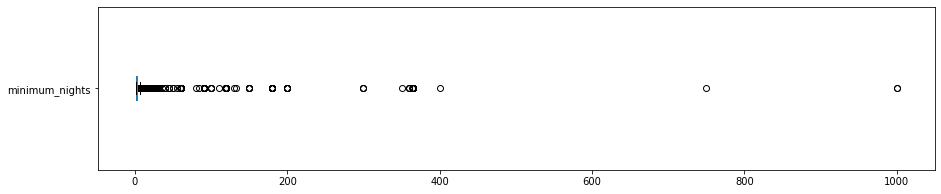

Minimum nights - Valores acima de 30:
163 entradas
0.5222%


In [0]:
# Minimum_nights

df_rome.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Verificando a quantidade de valores acima de 30

print('Minimum nights - Valores acima de 30:')
print('{} entradas'.format(len( df_rome[df_rome.minimum_nights > 30])))
print('{:.4f}%'.format(len(df_rome[df_rome.minimum_nights > 30])/df_rome.shape[0]*100))

#### Histogramas sem *outliers*

Como foi verificado *outliers* nas *features* `price` e `minimum_nights`, iremos realizar um processo de limpeza do *DataFrame* e plotar novamente.




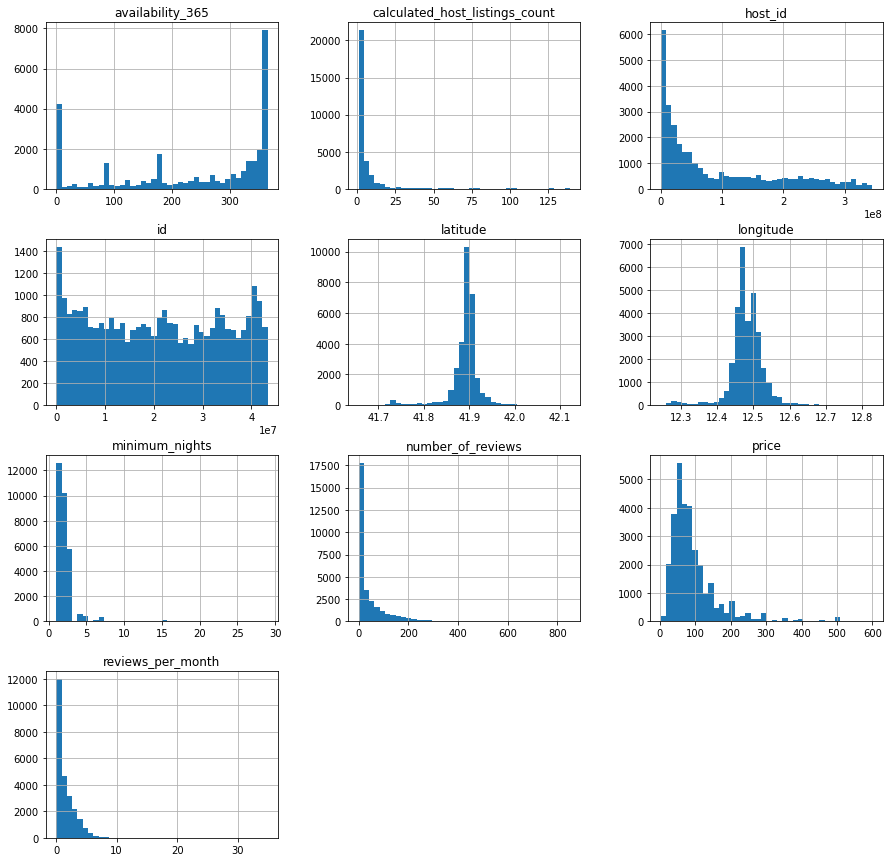

In [0]:
# Limpeza dos outliers em um novo DataFrame

df_rome_clean = df_rome.copy()

mask1 = df_rome_clean.price < 600
mask2 = df_rome_clean.minimum_nights < 30

df_rome_clean = df_rome_clean[mask1 & mask2]

# Removendo neighbourhood_group por estar vazio

df_rome_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotando o histograma para as variáveis númericas

df_rome_clean.hist(bins=40, figsize=(15,15));

### **Qual a média dos preços de aluguel?**

Após a limpeza dos dados de nosso *dataset* é possível extrair a média do preço dos aluguéis no Airbnb da cidade de Roma.

Para extrairmos a média de preços para aluguel utilizamos a função `mean()` na coluna `price`


In [0]:
# Verificando a média da coluna price

mean_price = df_rome_clean.price.mean()

print('Média dos preços: {:.2f}'.format(mean_price))

Média dos preços: 95.46


### **Qual a correlação existente entre as variáveis**

A correlação representa a relação entre duas variáveis, podendo ser mensurada e através da função do coeficiente de correlação estabelecer qual a intensidade dela.

Para isso, iremos criar uma matriz de correlação e a partir dela, gerar um *heatmap*, utilizando a biblioteca `seaborn`.


In [0]:
# Criando uma matriz de correlação

corr = df_rome_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.002494,-0.075434,-0.057721,0.134937,0.127921
minimum_nights,-0.002494,1.000000,-0.018045,-0.071385,-0.008749,-0.049081
number_of_reviews,-0.075434,-0.018045,1.000000,0.769656,-0.062822,0.104706
reviews_per_month,-0.057721,-0.071385,0.769656,1.000000,-0.053095,0.068663
calculated_host_listings_count,0.134937,-0.008749,-0.062822,-0.053095,1.000000,0.011815
availability_365,0.127921,-0.049081,0.104706,0.068663,0.011815,1.000000


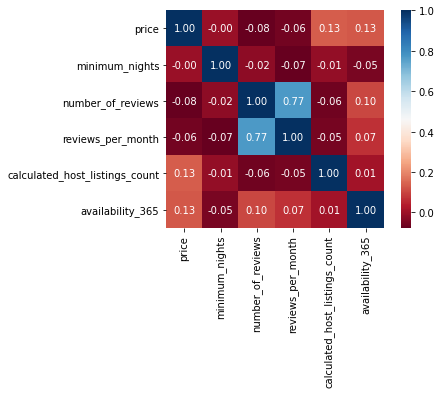

In [0]:
# Plotando um heatmap a partir das correlações

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot= True);

### **Qual o tipo de imóvel mais alugado no Airbnb?**

A variavél `room_type` indica o tipo de locação que esta anunciada no **Airbnb**, onde temos opções de apartamentos/casa inteiras, apenas um quarto ou até mesmo dividir o quarto com outras pessoas.

Para contar a quantidade de ocorrências de cada tipo, utilizaremos o método `value_counts()`.

In [0]:
# Mostrando a quantidade de cada tipo de imóvel disponível

df_rome_clean.room_type.value_counts()


Entire home/apt    19693
Private room        9086
Hotel room          1475
Shared room          240
Name: room_type, dtype: int64

In [0]:
# Mostrando a porcentagem de cada tipo de imóvel disponível

df_rome_clean.room_type.value_counts()/df_rome_clean.shape[0]

Entire home/apt    0.645799
Private room       0.297960
Hotel room         0.048370
Shared room        0.007870
Name: room_type, dtype: float64

### **Qual a localidade mais cara do dataset?**

Uma forma de verificar uma *feature* em função de outra é utilizando o método `groupby()`. No caso, nosso objetivo é comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [0]:
# Verificando preços por bairros, na média

df_rome_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
I Centro Storico              116.461491
IX Eur                         93.930362
XIII Aurelia                   85.418616
II Parioli/Nomentano           81.742908
XV Cassia/Flaminia             80.231317
XII Monte Verde                76.785985
X Ostia/Acilia                 69.892424
VII San Giovanni/Cinecittà     68.022936
XIV Monte Mario                67.519199
VIII Appia Antica              65.574822
Name: price, dtype: float64

In [0]:
# Analisando a quantidade de imóveis por bairro

df_rome_clean.neighbourhood.value_counts()[:10]

I Centro Storico              16113
VII San Giovanni/Cinecittà     2398
II Parioli/Nomentano           2256
XIII Aurelia                   2009
XII Monte Verde                1584
V Prenestino/Centocelle        1256
VIII Appia Antica               842
X Ostia/Acilia                  660
XIV Monte Mario                 599
IV Tiburtina                    576
Name: neighbourhood, dtype: int64

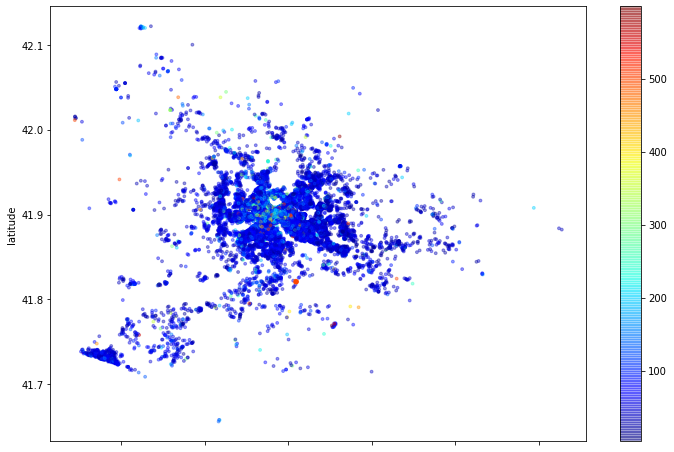

In [0]:
# Plotando os imóveis pela latitude-longitude
df_rome_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
                   c=df_rome_clean['price'], s=8, cmap=plt.get_cmap('jet'),
                   figsize=(12,8));

### **Qual é a média do mínimo de noites para aluguel ?**

Para identificarmos a média do mínimo de noites para aluguel utilizamos, novamente, a função `mean()` extraindo da coluna `minimum_nights`


In [0]:
# Verificando a média da coluna minimum_nights

mean_minimum_nights = df_rome_clean.minimum_nights.mean()

print('A média do mínimo de noites é {:.2f}'.format(mean_minimum_nights))

A média do mínimo de noites é 2.11


## Conclusões


Através desta análise superficial na base de dados do **Airbnb**, percebeu-se que:
* A maior quantidade de imóveis disponíves para locação encontram-se na região central de Roma, principalmente no bairro *Centro Storico*, sendo um total de **16113 imóveis**.
* O bairro com a maior média de preço, também foi o *Centro Storico* com uma média de **€116.46**.
* A maior quantidade de imóveis para a disposição para locação são de casas/apartamentos inteiros, num total de **19693 imóveis**.
* A média do mínimo de noites necessárias para realizar um aluguel é de aproximadamente **2 noites**.
